### Basic Usage of interpreTS Library

This notebook demonstrates how to use the interpreTS library for feature extraction from time series data.

##### Step 1: Import Libraries


In [ ]:
import pandas as pd
import numpy as np
from interpreTS.core.feature_extractor import FeatureExtractor, Features

In [2]:
import interpreTS
print(f"interpreTS version: {interpreTS.__version__}")

interpreTS version: 0.5.0


##### Step 2: Prepare Sample Time Series Data

In [3]:
# Create a sample time series DataFrame
np.random.seed(42)  # For reproducibility
data = pd.DataFrame({
    "timestamp": pd.date_range(start="2023-01-01", periods=100, freq="D"),
    "value": np.random.randn(100),
    "id": np.repeat([1, 2], 50)  # Two different time series (IDs 1 and 2)
})

# Display the first few rows of the data
print("Sample data:")
print(data.head())

Sample data:
   timestamp     value  id
0 2023-01-01  0.496714   1
1 2023-01-02 -0.138264   1
2 2023-01-03  0.647689   1
3 2023-01-04  1.523030   1
4 2023-01-05 -0.234153   1


##### Step 3: Initialize FeatureExtractor

The FeatureExtractor class is the central component of the library. You can specify features to extract, the time window size, and other parameters.

In [4]:
# Initialize the FeatureExtractor
extractor = FeatureExtractor(
    features=[
        Features.MEAN,
        Features.VARIANCE,
        Features.HETEROGENEITY,
        Features.SPIKENESS
    ],  # Specify features to extract
    window_size=10,  # Rolling window size of 10 samples
    stride=5,  # Step size of 5 samples
    id_column="id",  # Group by 'id' column
    feature_column="value"  # Extract features from the 'value' column
)


##### Step 4: Extract Features

Use the extract_features method to calculate features for the specified rolling windows.

In [5]:
# Extract features
features = extractor.extract_features(data)

# Display the extracted features
print("Extracted features:")
print(features.head())


Extracted features:
   mean_value  variance_value  heterogeneity_value  spikeness_value
0    0.448061        0.470467             1.613638         0.412307
1   -0.213979        1.032079             5.004545        -0.131802
2   -0.790658        0.513464             0.955311         0.015516
3   -0.424293        0.698953             2.077002         1.013266
4   -0.221844        0.596187             3.668792         0.630831


##### Step 5: Visualize Extracted Features

Visualize the extracted features to understand the time series' behavior better.

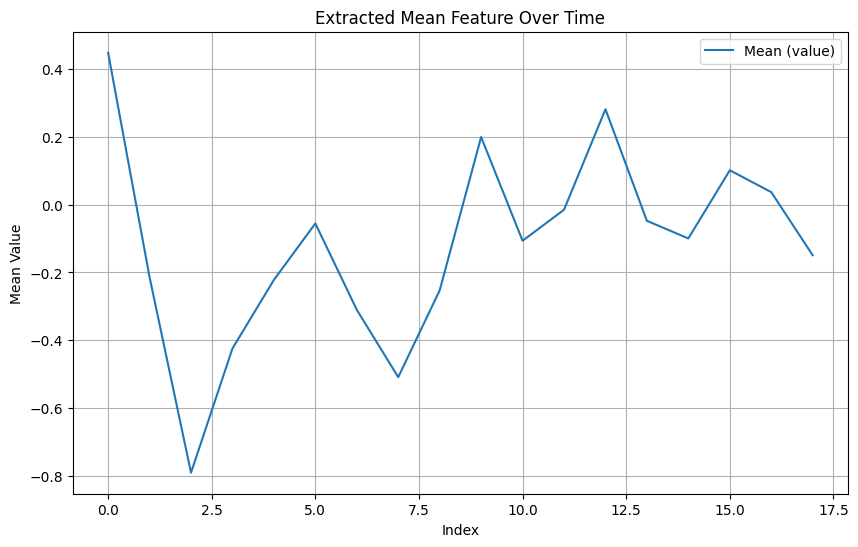

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot one of the extracted features over time
plt.figure(figsize=(10, 6))
plt.plot(features.index, features['mean_value'], label="Mean (value)")
plt.title("Extracted Mean Feature Over Time")
plt.xlabel("Index")
plt.ylabel("Mean Value")
plt.legend()
plt.grid()
plt.show()


##### Step 6: Add a Custom Feature

You can also add a custom feature to the library.

In [7]:
# Define a custom feature function
def calculate_range(data):
    return data.max() - data.min()

# Register the custom feature
extractor.add_custom_feature(
    name="RANGE",
    function=calculate_range,
    metadata={
        "level": "easy",
        "description": "Range of values in the window (max - min)."
    }
)

# Extract features again, including the custom feature
features_with_custom = extractor.extract_features(data)

# Display the features with the custom feature
print("Extracted features with custom feature:")
print(features_with_custom.head())


Custom feature 'RANGE' added successfully.
Extracted features with custom feature:
   mean_value  variance_value  heterogeneity_value  spikeness_value
0    0.448061        0.470467             1.613638         0.412307
1   -0.213979        1.032079             5.004545        -0.131802
2   -0.790658        0.513464             0.955311         0.015516
3   -0.424293        0.698953             2.077002         1.013266
4   -0.221844        0.596187             3.668792         0.630831


##### Step 7: Use the Library with Time-Based Windows

In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)
data.sort_index(inplace=True)
data = data.asfreq('1D')
data.fillna(method='ffill', inplace=True)

# Initialize the FeatureExtractor with time-based windows
time_based_extractor = FeatureExtractor(
    features=[Features.MEAN, Features.VARIANCE],
    window_size="10d",
    stride="5d",
    id_column="id",
    sort_column="timestamp",
    feature_column="value"
)

time_based_features = time_based_extractor.extract_features(data)

print("Extracted features with time-based windows:")
print(time_based_features.head())

Extracted features with time-based windows:
   mean_value  variance_value
0    0.448061        0.470467
1   -0.213979        1.032079
2   -0.790658        0.513464
3   -0.424293        0.698953
4   -0.221844        0.596187


C:\Users\nisia\AppData\Local\Temp\ipykernel_28680\2252922758.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


##### Step 8: Use Advanced Features (e.g., HETEROGENEITY)

Heterogeneity measures the coefficient of variation, providing insights into variability.

In [9]:
# Initialize the FeatureExtractor for heterogeneity
heterogeneity_extractor = FeatureExtractor(
    features=[Features.HETEROGENEITY],
    window_size=20,
    stride=10,
    id_column="id",
    feature_column="value"
)

# Extract heterogeneity
heterogeneity_features = heterogeneity_extractor.extract_features(data)

# Display the extracted heterogeneity feature
print("Extracted heterogeneity features:")
print(heterogeneity_features.head())


Extracted heterogeneity features:
   heterogeneity_value
0             5.604416
1             1.615857
2             3.639584
3             3.564077
4             8.506366
